<a href="https://colab.research.google.com/github/johntango/PS2HouseDataExercise/blob/master/Predict_House_Prices_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [3]:
data = pd.read_csv('train.csv')
train = data.iloc[0:1000,:]

train.to_json('housedata.json')

# print shape of train data
train.shape

(1000, 81)

# New Section

In [4]:
# Print all non-numeric columns
print(train.select_dtypes(exclude=[np.number]).columns)
# print heating, central air, and kitchen quality
# print sale type and sale price
print(train[['PavedDrive', 'SalePrice']].head())
# print unique values for sale type
print(train['PavedDrive'].unique())

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
  PavedDrive  SalePrice
0          Y     208500
1          Y     181500
2          Y     223500
3          Y     140000
4          Y     250000
['Y' 'N' 'P']


In [5]:
# investigate Sale Price
train['SalePrice']

0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
995    121600
996    136500
997    185000
998     91000
999    206000
Name: SalePrice, Length: 1000, dtype: int64

(array([ 99., 493., 254.,  93.,  38.,  15.,   4.,   2.,   1.,   1.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

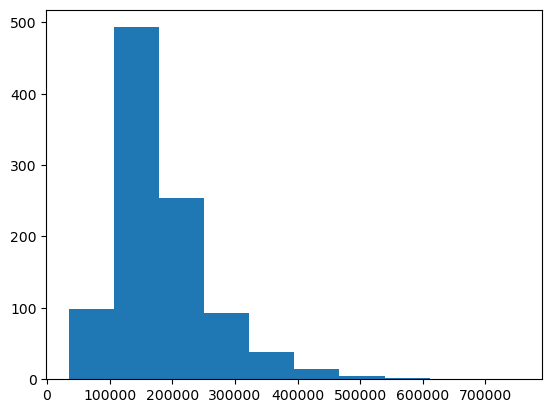

In [6]:
# plot hist
plt.hist(train['SalePrice'])

In [7]:
# select numeric columns
# calculate correlation factor
# convert MSZoning to numeric using pd.get_dummies
def process_data(train):

    # convert alley to boolean 
    train['Alley'] = train['Alley'].notnull()
    # convert alley to zero/one
    train['Alley'] = train['Alley'].astype(int)

    # convert central air to boolean 
    train['CentralAir'] = train['CentralAir'].notnull()
    # convert central air to zero/one
    train['CentralAir'] = train['CentralAir'].astype(int)


    # convert neighborhood to numeric using pd.get_dummies
    neighborhood_dummies = (pd.get_dummies(train['Neighborhood']))
    # add dummies to train
    train = pd.concat([train, neighborhood_dummies], axis=1)

    
    return train

In [8]:
train = process_data(train)
print(train.columns)
numeric = train.select_dtypes(include=[np.number])
numeric.shape

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities',
       ...
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object', length=106)


/tmp/ipykernel_7929/1557960584.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Alley'] = train['Alley'].notnull()
/tmp/ipykernel_7929/1557960584.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Alley'] = train['Alley'].astype(int)
/tmp/ipykernel_7929/1557960584.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

(1000, 65)

In [9]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False).index[0:40]
# cast to list
cols = cols.tolist()
print(len(cols))


40


In [10]:
# pick out X cols and Y = SalePricee
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)

# if id in X, drop it
if 'Id' in X.columns:
    ids = X['Id']
    X = X.drop(['Id'], axis = 1)


In [11]:
# Remove nan values from X
X = X.dropna(axis=1)
X.shape
#print(X.columns)


(1000, 36)

In [12]:
# scale X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [13]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [14]:
# How good is the model
model.score(X,Y)


0.8654931566194045

In [26]:
# Calculate mean squared error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y, predictions))


866255352.312069


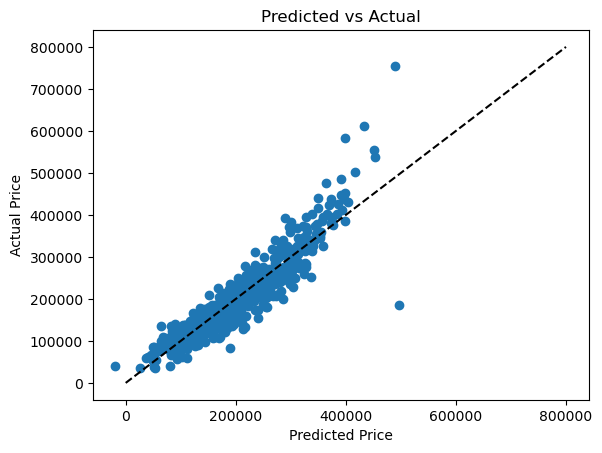

In [16]:
# Scatter plot of predictions
plt.scatter(predictions, Y)
# add axis labels
# add title
# add line
plt.plot([0, 800000], [0, 800000], '--k')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()

In [17]:
# load test data
test = pd.read_csv('test.csv')
test.shape
ids = test['Id']


In [18]:
test = process_data(test)
# Remove saleprice from cols
print(cols)
if 'SalePrice' in cols:
    cols.remove('SalePrice')
test = test[cols]


test = test.select_dtypes(include=[np.number])
test.shape

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'NridgHt', 'BsmtFinSF1', 'LotFrontage', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'HalfBath', 'NoRidge', 'LotArea', 'StoneBr', 'BsmtUnfSF', 'BsmtFullBath', 'BedroomAbvGr', 'Somerst', 'ScreenPorch', 'Timber', 'Veenker', 'CollgCr', 'ClearCr', 'Crawfor', 'MoSold', 'NWAmes', 'Gilbert', 'Blmngtn', 'PoolArea', '3SsnPorch']


(460, 39)

In [19]:
# only keep numeric columns in test

if 'Id' in test.columns:
    test = test.drop(['Id'], axis = 1)
test = test.dropna(axis=1)
scaler = StandardScaler()
test = scaler.fit_transform(test)
test.shape

(460, 36)

In [20]:

test_predictions = model.predict(test)


In [21]:
# write predictions and ids to csv
output = pd.DataFrame({'ID': ids, 'SALEPRICE': test_predictions})
print(output)

output.to_csv('predictions.csv', index=False)

       ID      SALEPRICE
0    1001   63116.499475
1    1002   73001.754470
2    1003  255264.292961
3    1004  155891.789160
4    1005  202366.578017
..    ...            ...
455  1456  180029.852519
456  1457  231152.035776
457  1458  234462.674019
458  1459  137932.066519
459  1460  159219.277541

[460 rows x 2 columns]


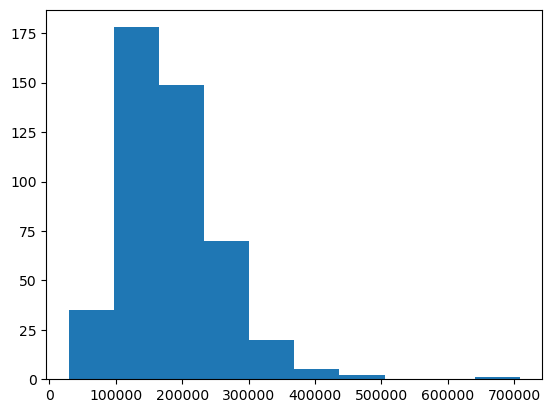

In [22]:
# Plot predictions
plt.hist(test_predictions)
# Plot last 460 rows of train
# make it transparent
plt.show()